(C:digital-images:displaying)=
# Displaying an image

Displaying an image needs to convert the pixel intensities $\{i_1,\dots,i_B\}$ into gray levels or colors.
Screens are basically a matrix of pixels, each composed of red, green and blue luminophores
(the shape, size and number of luminophores depends of the technology).
Colors can be recreated by adjusting the luminophore intensities,
thanks to the principles of additive color mixing (see {numref}`F:digital-images:additive-mixing`).
The correspondance between the numerical value of the intensities and colors on the screen
is visually reprensented by a _colormap_.

## Displaying a 2D grayscale image

A 2D grayscale image is an array with $d=2$ dimensions where each pixel contains a scalar ($B=1$).
Therefore, each pixel is displayed with a specific gray level.
{numref}`F:intro:colormap` shows the same image with different colormaps.
As you can see, the choice of the colormap changes the perception of the colors,
even though the information contained by the pixels remains unchanged.

```{figure} colormaps.svg
---
name: F:intro:colormap
---
An image showing Buzz Aldrin displayed with the colormaps given below the images.
```

Note that the 3 images in {numref}`F:intro:colormap` are all grayscale images, even if one is displayed with colors.

Colormaps are sometimes useful to bring out dark objects in an image with poor contrast.
The code below shows an image with one bright spot, clearly visible on the first image,
along four faint spots which are not visible with the usual colormap "gray".
However, the socalled "jet" colormap makes the faint spots visible.
Also, displaying the logarithm of the image helps to make the spots visible (see [Histogram transformations](C:histogram-transformations)).

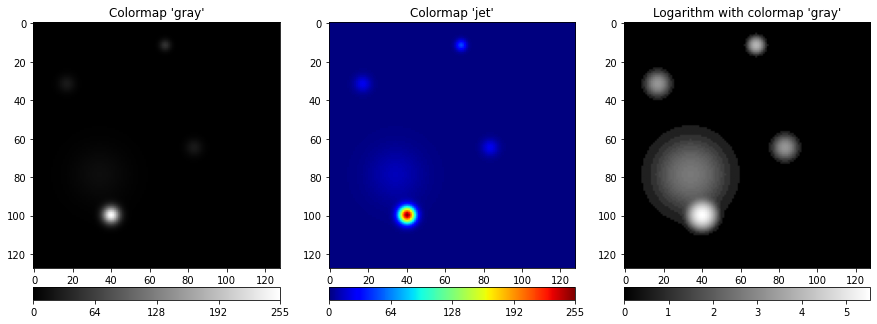

In [19]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

# Load the image
img = io.imread("../_static/figs/spots.png")

# Prepare the figure with three images
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

# Arguments for colorbar
kwargs = { "orientation":"horizontal", "pad": 0.05, "shrink": 1.0 }

# Display the image with colormap gray
im = axs[0].imshow(img, cmap="gray")
axs[0].set_title("Colormap 'gray'")
fig.colorbar(im, ax=axs[0], ticks=[0, 64, 128, 192, 255], **kwargs)

# Display the image with colormap jet
im = axs[1].imshow(img, cmap="jet" )
axs[1].set_title("Colormap 'jet'")
fig.colorbar(im, ax=axs[1], ticks=[0, 64, 128, 192, 255], **kwargs)

# Display the logarithm of the image
img_log = np.log(1. + img)
im = axs[2].imshow(img_log, cmap="gray")
axs[2].set_title("Logarithm with colormap 'gray'")
fig.colorbar(im, ax=axs[2], ticks=np.arange(6), **kwargs)

# Show the figure
plt.show()

## Displaying a 2D color image

As we have seen in [](C:digital-images:acquisition), the retina of human eye contains three kinds of cone cells
which are basically sensitive to blue, green and red light.
So, a color image is simply a composition of the intensities of these three wavelengths, so that $B=3$.
Each of these three bands codes the intensity of red, green and blue lights of the image, hence the name RGB (red, green, blue).
This is why digital screens are made of red, green and blue luminophores.

## Displaying other types of images

There is not a straightforward way to display an image which is neither a 2D grayscale nor RGB image.
Such image are either not displayed, or displayed by using a specific representation.
For example, only three bands can be selected and displayed as an RGB image.
Another possibility is to gather the bands into three groups and compute the means within each group,
these means becoming the three bands of a standard RGB image.

<!-- niveau gris, images en fausses couleurs -->